# Classification and Regression Metrics

## Lecture Learning Objectives 

- Explain why accuracy is not always the best metric in ML.
- Explain components of a confusion matrix.
- Define precision, recall, and f1-score and use them to evaluate different classifiers.
- Identify whether there is class imbalance and whether you need to deal with it.
- Explain `class_weight` and use it to deal with data imbalance.
- Appropriately select a scoring metric given a regression problem.
- Interpret and communicate the meanings of different scoring metrics on regression problems. MSE, RMSE, $R^2$, MAPE.
- Apply different scoring functions with `cross_validate`, `GridSearchCV` and `RandomizedSearchCV`.

## Five Minute Recap/ Lightning Questions 

- What is the difference between a business and a statistical question?
- Should we ever question our clients' requests? 
- What is an important feature?
- What are some types of feature selection methods?

### Some lingering questions

- How can we measure our model's success besides using accuracy or $R2$?
- How should we interpret our model score if we have data where there is a lot of one class and very few of another?

## Introducing Evaluation Metrics 

Up until this point, we have been scoring our models the same way every time.
We've been using the percentage of correctly predicted examples for classification problems and the $R^2$ metric for regression problems.
Let's discuss how we need to expand our horizons and why it's important to evaluate our models in other ways.

To help explain why accuracy isn't always the most beneficial option, we are going back to the creditcard data set from the first class.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split


cc_df = pd.read_csv('data/creditcard_sample.csv', encoding='latin-1')
train_df, test_df = train_test_split(cc_df, test_size=0.3, random_state=111)
train_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2210,139995.0,0.000822,0.176378,-0.081084,-2.240657,0.266328,-1.458596,0.658240,-0.340358,-1.124072,...,0.574194,1.741723,-0.110379,0.053146,-0.692897,-0.207781,0.460053,0.307173,15.00,0
98478,139199.0,1.898426,-0.544627,0.021055,0.233999,-0.690212,0.343812,-0.976358,0.241278,0.957517,...,0.118648,0.439855,0.323290,0.749224,-0.580108,0.317277,-0.005703,-0.034896,23.36,0
75264,147031.0,1.852468,-0.216744,-1.956124,0.360745,0.415657,-0.577488,0.229426,-0.215398,0.913203,...,-0.198389,-0.526080,0.093325,0.322035,-0.030224,-0.113123,-0.022952,0.000988,109.54,0
66130,50102.0,-0.999481,0.849393,-0.556091,0.259464,2.298113,3.728162,-0.258322,1.353233,-0.503258,...,-0.082967,-0.136016,0.092160,1.009201,0.216844,-0.236471,0.201575,0.101621,20.24,0
82331,41819.0,-0.417792,1.027810,1.560763,-0.029187,-0.076807,-0.904689,0.688554,-0.056332,-0.369867,...,-0.229592,-0.609212,-0.019424,0.356282,-0.198697,0.072055,0.264011,0.120743,2.69,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105747,86420.0,1.539769,-0.710190,-0.779133,0.972778,0.521677,1.992379,-0.538152,0.592431,0.530753,...,-0.020365,-0.203199,0.323143,-0.793579,-0.611899,-0.926726,0.073134,-0.018315,147.80,0
102486,113038.0,-0.509300,1.128383,-0.876960,-0.568208,0.819440,-0.749178,0.903256,0.068764,0.068195,...,-0.391476,-0.860542,0.061769,0.387231,-0.334076,0.101585,0.085727,-0.194219,44.99,0
4820,142604.0,1.906919,-0.398941,0.275837,1.736308,-0.710844,0.682936,-1.180614,0.443751,0.047498,...,-0.022269,-0.163610,0.499126,0.731827,-1.088328,2.005337,-0.153967,-0.061703,3.75,0
10196,139585.0,2.106285,-0.102411,-1.815538,0.256847,0.340938,-1.002490,0.373141,-0.314247,0.541619,...,-0.060222,-0.047904,0.124192,0.771908,0.144864,0.645126,-0.117185,-0.074093,5.41,0


In [2]:
train_df.shape

(85504, 31)

We can see this is a quite large dataset!

In [3]:
train_df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,85504.000000,85504.000000,85504.000000,85504.000000,85504.000000,85504.000000,85504.000000,85504.000000,85504.000000,85504.000000,...,85504.000000,85504.000000,85504.000000,85504.000000,85504.000000,85504.000000,85504.000000,85504.000000,85504.000000,85504.000000
mean,111177.965218,0.069621,-0.035379,-0.296593,-0.028028,0.086975,-0.030399,0.025395,-0.017036,0.042680,...,0.017353,0.052381,0.012560,-0.009845,-0.048255,-0.014074,-0.003047,-0.002209,92.724942,0.004128
std,48027.531032,2.108440,1.780371,1.631892,1.466457,1.452847,1.354052,1.361786,1.258107,1.131435,...,0.776954,0.755315,0.670336,0.607638,0.548000,0.481118,0.414234,0.369266,271.297276,0.064121
min,406.000000,-56.407510,-72.715728,-33.680984,-5.683171,-40.427726,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-36.666000,-2.824849,-8.696627,-2.534330,-9.895244,-8.656570,0.000000,0.000000
25%,50814.000000,-0.886089,-0.634044,-1.228706,-0.871992,-0.622997,-0.801849,-0.550769,-0.234941,-0.616671,...,-0.225345,-0.524692,-0.160006,-0.365718,-0.375934,-0.331664,-0.074373,-0.058973,5.990000,0.000000
50%,133031.500000,0.064451,0.027790,-0.206322,-0.099292,0.060853,-0.300730,0.076727,0.001596,0.003678,...,-0.008602,0.074564,0.002990,0.027268,-0.062231,-0.061101,-0.003718,-0.003411,22.660000,0.000000
75%,148203.000000,1.832261,0.796311,0.767406,0.635543,0.735001,0.374897,0.632747,0.310501,0.658517,...,0.215080,0.622089,0.177875,0.458784,0.317849,0.230836,0.088166,0.076868,80.000000,0.000000
max,172788.000000,2.451888,22.057729,4.187811,16.715537,34.801666,23.917837,44.054461,19.587773,9.234623,...,27.202839,10.503090,20.803344,3.979637,7.519589,3.155327,10.507884,33.847808,19656.530000,1.000000


We see that the columns are all scaled and numerical.

You don't need to worry about this now. The original columns have been transformed already for confidentiality and our benefit so now there are no categorical features.

Let's separate `X` and `y` for train and test splits.

In [4]:
X_train_big, y_train_big = train_df.drop(columns=["Class"]), train_df["Class"]
X_test, y_test = test_df.drop(columns=["Class"]), test_df["Class"]



We are going to be talking about evaluation metrics and it's easier to do so if we use an explicit validation set instead of using cross-validation.

Our data is large enough so it shouldn't be a problem.

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_big,  y_train_big, test_size=0.3, random_state=123)

### Baseline

Just like and predictive question, we start our analysis by building a simple `DummyClassifier` model as our baseline.

In [6]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
dummy.score(X_train, y_train)

0.9958564458998864

In [7]:
dummy.score(X_valid, y_valid)

0.9959067519101824

Almost 100% accuracy? This is supposed to be a baseline model! How is it getting such high accuracy? 
Should we just deploy this `DummyClassifier` model for fraud detection?

Not so fast...
If we look at the distribution of fraudulent labels to non-fraudulent labels, we can see there is an imbalance in the classes. 

In [8]:
train_df["Class"].value_counts(normalize=True)

0    0.995872
1    0.004128
Name: Class, dtype: float64

Here the `0` class is a Non fraud transaction, and the `1` class is a Fraud transaction. 
We can see here that there are MANY Non fraud transactions and only a tiny handful of Fraud transactions.
So, what would be a good accuracy here? 99.9%? 99.99%?

Let's see if a logistic regression model would get a higher score than the Dummary model.

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

pipe = make_pipeline(
       (StandardScaler()),
       (LogisticRegression(random_state=123))
)

pd.DataFrame(cross_validate(pipe, X_train, y_train, return_train_score=True)).mean()

fit_time       0.372812
score_time     0.004492
test_score     0.998830
train_score    0.998993
dtype: float64

This seems slightly better than `DummyClassifier`, but the question is can it really identify fraudulent transactions?
The "Fraud" class is the class that we want to spot. The class we are interested in. 
Let's looks at some new metrics that can help us assess how well our model is doing overall and not just for the majority class label.

## Classification Metrics and tools

### What is "positive" and "negative"?

There are two kinds of binary classification problems:

- Distinguishing between two classes
- Spotting a specific class (fraud transaction, spam, disease)

In the case of spotting problems, the thing that we are interested in spotting is considered "positive"
(not related to how a logistic regression model internall defines a "positive" and "negative" class). 
In our example, we want to spot **fraudulent** transactions and so fraudulent is the "positive" class. 

### Confusion Matrix

A **confusion matrix** is a table that visualizes the performance of an algorithm. It shows the possible labels and how many of each label the model predicts correctly and incorrectly. 

Here we first fit and predict the model,
and then show it's confusion matrix.

In [10]:
from sklearn.metrics import confusion_matrix


pipe.fit(X_train, y_train)
predictions = pipe.predict(X_valid)
cm = confusion_matrix(y_valid, predictions)
cm

array([[25541,     6],
       [   25,    80]])

#### Confusion Matrix components

|   X   | predict negative | predict positive |
|------|----------|-------|
| negative example | True negative (TN) | False positive (FP)|
| positive example | False negative (FN) | True positive (TP) |


Remember the Fraud is considered "positive" in this case and Non fraud is considered "negative". 


The 4 quadrants of the confusion matrix can be explained as follows. These positions will change depending on what values we deem as the positive label. 

- **True negative (TN)**: Examples that are negatively labelled that the model correctly predicts. This is in the top left quadrant. 
- **False positive (FP)**: Examples that are negatively labelled that the model incorrectly predicts as positive. This is in the top right quadrant. 
- **False negative (FN)**:  Examples that are positively labelled that the model incorrectly predicts as negative. This is in the bottom left quadrant. 
- **True positive (TP)**:  Examples that are positively labelled that the model correctly predicted as positive. This is in the bottom right quadrant. 

Instead of looking just at the numbers and remembering what each category represents,
we can use the `ConfusionMatrixDisplay` class
(the `plot_confusion_matrix` function in earlier version of sklearn)
to visualize how well our model is doing classifying each target class.

We can use `classes` to see which position each label takes so we can designate them more comprehensive labels in our plot. 

In [11]:
pipe.classes_

array([0, 1])

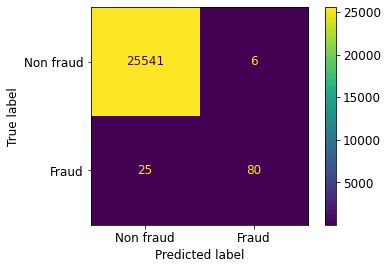

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


plt.rc('font', size=12) # bigger font sizes
ConfusionMatrixDisplay(cm, display_labels=["Non fraud", "Fraud"]).plot()

In fact,
we don't even need to manually create the confusion matrix before plotting it,
but can instead build it straight from the fitted estimator.
In this case, we only need to fit the model before visualizing it
(the predictions are done automatically on the validation/test data set that we pass in)
This results in a 2 by 2 matrix with the labels `Non fraud` and `Fraud` on each axis. 

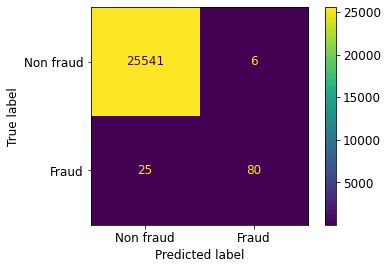

In [13]:
pipe.fit(X_train, y_train)  # We already did this above, but adding it here for clarity

ConfusionMatrixDisplay.from_estimator(
    pipe,
    X_valid,
    y_valid,
    display_labels=["Non fraud", "Fraud"],
);

**Looking at the plotting arguments:**

- Similar to other `sklearn` functions, we pass the model/pipeline followed by the feature table and then the target values. 
- `display_labels` will show more descriptive labels. without this argument, it would simply show the classes we have in the data (`0`, `1`). 
- `values_format` will determine how the numbers are displayed. Specifying `d` avoids scientific notation for large numbers (not needed in this example). 
- `cmap` is the colour argument! The default is `viridis` but other values such as `Blues`, `Purples`, `RdPu` or other colour schemes from [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html) are also possible. 

### Accuracy is only part of the story...

We have been using `.score` to assess our models, which returns accuracy by default
for classification models.
We just saw that accuracy can be  misleading when we have a class imbalance,
so maybe there are other metrics that are more suitable in these cases?

*Note that the metrics we are going to discuss will only help us assess our model assessment.
Further into this lecture we'll talk about a few ways to address the class imbalance problem as well.*

To understand the metrics we are going to talk about next,
we will need our values for the four different quadrants in the confusion matrix.
We are going to split up the values in the matrix into four separate variables

- `TN` for the True Negatives
- `FP` for the False Positives
- `FN` for the False Negatives
- `TP` for the True Positives 

In [14]:
TN, FP, FN, TP = cm.flatten()

Now let's look at the first metric, "Recall"

### Recall 

*"Among all positive examples, how many did the model identify?"*

Recall is the ability of the classifier to find all the positive samples.
You can think of this as "What was the model's recall/hit rate out of **all the truly positive observations**".
The denominator in the equation below is all the truly positive values.

$$ \text{recall} = \frac{\text{Number of correctly identified positives}}{\text{Total number of true positives}} = \frac{TP}{TP + FN} $$

In binary classification,
recall is sometimes used more generally for either the positive or negative class:
recall of the positive class is also known as "sensitivity"
and recall of the negative class is "specificity",
which are terms you might recognize from your statistics classes.
In machine learning we almost always refer to "sensitivity" when we just say "recall".

Since Fraud is our positive label, we see the correctly identified labels in the bottom right quadrant and the ones that we missed in the bottom left quadrant. 

<!-- <img src='imgs/recall.png' width="50%">  -->

![image.png](imgs/cm-recall.png)

So here we take our true positives and we divide by all the positive labels in our validation set (the predictions the model incorrectly labelled as negative (the false negatives) as well as those correctly labelled as positive). 

In [15]:
print('True Positives:', TP)
print('False Negatives:', FN)

True Positives: 80
False Negatives: 25


In [16]:
recall = TP / (TP + FN)
recall.round(3)

0.762

### Precision

*"Among the positive examples you identified, how many were actually positive?"*

Precision is the ability of the classifier to avoid putting a positive label on a negative observation.
You can think of this as "How precise are the model's **predictions**?".
The denominator in the equation below is all the predicted positive values.

$$ \text{precision} = \frac{\text{Number of correctly identified positives}}{\text{Total number of predicted positives}} = \frac{TP}{TP + FP} $$


With Fraud as our positive label,  we see the correctly identified Fraudulent cases in the bottom right quadrant and the labels we incorrectly labelled as Frauds in the top right. 

<!-- <img src='imgs/precision.png' width="50%">  -->

![image.png](imgs/cm-precision.png)

So here we take our true positives and we divide by all the positive labels that our model predicted. 

In [17]:
print('True Positives:', TP)
print('False Positives:', FP)

True Positives: 80
False Positives: 6


In [18]:
precision = TP / (TP + FP)
precision.round(3)

0.93

Of course, we'd like to have both high precision and recall but the balance depends on our domain,
and which type of error we think is more important to avoid.
For credit card fraud detection,
recall is really important (catching frauds),
precision is less important (reducing false positives)
since there likely will be a manual review process in place to look closer at the predicted frauds
and prevent false accusations
(whereas there likely are too many observations to have a manual review process for all the potentially missed frauds).

### Visualization of precision and recall

In case you find the concepts above hard to follow or remember,
I am including this schematic as a visual aid

![image.png](imgs/recall-precision-schematic.png)

Source: https://en.wikipedia.org/wiki/Precision_and_recall

### f1 score

Sometimes we need a single score to maximize, e.g., when doing hyperparameter tuning via RandomizedSearchCV.
Accuracy is often a not the ideal choice,
and we might care about both the precision and recall.
One way of combining these two into a single score is to average them.
However,
in machine learning,
we usually use a different way of averaging these metrics together,
which is called the "harmonic mean".
The advantage of this is that it penalizes the model more for performing poorly in either of the precision or recall,
whether if we just took the common arithmetic mean,
the model could compensate e.g. for a low recall with a high precision and still get a high overall score.

The harmonic mean of the precision and recall is called the `f1` score:

$$ \text{f1} = 2 * \frac{\text{precision} * \text{recall}}{\text{precision} + \text{recall}} $$

In [19]:
print('Precision:', precision.round(4))
print('Recall:', recall.round(4))

Precision: 0.9302
Recall: 0.7619


In [20]:
f1_score = (2 * precision * recall) / (precision + recall)
f1_score.round(3)

0.838

We could calculate all these evaluation metrics by hand
using the formulas we have covered so far: 

In [21]:
data = {}
data["accuracy"] = [(TP + TN) / (TN + FP + FN + TP)]
data["precision"] = [ TP / (TP + FP)] 
data["recall"] = [TP / (TP + FN)] 
data["f1 score"] = [(2 * precision * recall) / (precision + recall)] 

measures_df = pd.DataFrame(data)
measures_df

,accuracy,precision,recall,f1 score
0,0.998792,0.930233,0.761905,0.837696


... or we can use `scikit-learn` which has functions for these metrics.

Here we are importing `accuracy_score`, `precision_score`, `recall_score`, `f1_score` from `sklearn.metrics`

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


pred_cv =  pipe.predict(X_valid) 

data["accuracy"].append(accuracy_score(y_valid, pred_cv))
data["precision"].append(precision_score(y_valid, pred_cv))
data["recall"].append(recall_score(y_valid, pred_cv))
data["f1 score"].append(f1_score(y_valid, pred_cv))

pd.DataFrame(data, index=['by-hand', 'sklearn'])

,accuracy,precision,recall,f1 score
by-hand,0.998792,0.930233,0.761905,0.837696
sklearn,0.998792,0.930233,0.761905,0.837696


And you can see the scores match. 

We can even go one step further and "observe" the scores using a *Classification report* 

### Classification report 

Similar to how a confusion matrix shows the False and True negative and positive labels, a classification report shows us an assortment of metrics, however, we can't flatten or obtain the results from it and only see what is printed as the output. 

We can import `classification_report` from `sklearn.metrics`

In [23]:
from sklearn.metrics import classification_report

In our function, we specify the true labels, followed by the predictions our model made. 

The argument `target_names`, gives more descriptive labels similar to what `display_labels` did when plotting the confusion matrix. 

In [24]:
print(
    classification_report(
        y_valid,
        pipe.predict(X_valid),
        target_names=["non fraud", "Fraud"]
    )
)

              precision    recall  f1-score   support

   non fraud       1.00      1.00      1.00     25547
       Fraud       0.93      0.76      0.84       105

    accuracy                           1.00     25652
   macro avg       0.96      0.88      0.92     25652
weighted avg       1.00      1.00      1.00     25652



Note that what you consider "positive" (Fraud in our case) is important when calculating precision, recall, and f1-score. 
If you flip what is considered positive or negative, we'll end up with different True Positive, False Positive, True Negatives and False Negatives, and hence different precision, recall, and f1-scores. 
The `support` column just shows the number of examples in each class.  

You might be wondering about the two lines at the end of this report,
so let's cover that next.

#### Macro average vs weighted average

These are the average for the positive and negative class in each of the metrics.

- **Macro average** gives equal importance to all classes irrespective of the number of observations (support) in each class.
- **Weighted average** weighs the average by the number of observations (support) in each class.

Which one is relevant, depends upon whether you think each class should have the same weight or each sample should have the same weight. 
These metrics are often useful when predicting multiple classes which we will briefly discuss later on. 

In addition to this lecture, my wonderful colleague [Varada Kolhatkar](https://kvarada.github.io/) has made a cheat sheet for these metrics available in a larger size [here](https://raw.githubusercontent.com/UBC-MDS/introduction-machine-learning/master/static/module7/evaluation-metrics.png).

<img src="https://raw.githubusercontent.com/UBC-MDS/introduction-machine-learning/master/static/module7/evaluation-metrics.png"  width = "90%" alt="404 image" />

### Imbalanced datasets

A class imbalance typically refers to having many more examples of one class than another in one's training set.
We've seen this in our fraud dataset where our `class` target column had many more non-fraud than fraud examples. 
Real-world data is often imbalanced and can be seen in scenarios such as:

- Ad clicking data (Only around ~0.01% of ads are clicked.)
- Spam classification datasets.


In [25]:
y_train.value_counts('Class')

0    0.995856
1    0.004144
Name: Class, dtype: float64

#### Addressing class imbalance

A very important question to ask yourself: ***"Why do I have a class imbalance?"***

- Is it because of my data collection methods?
    - If it's the data collection, then that means the you need to rethink how you have collected the data and if you can recollect it to balance the classes (note: it might be dangerous to go out and just collect new observations of the least common class since these would be collected after the original data and if the data changed over time, these newly collected observations will be different than the old one not because of their class, but because of the date they were collected.
- Is it because one class is much rarer than the other?
    - If it's because one is rarer than the other in the true data distribution, you need to think about which type of error is more important to the stakeholders and prioritize how you train the model and how you assess its performance.

#### Handling imbalance

Can we change the model itself so that it considers the errors that are important to us?

There are two common approaches to this: 

1. **Changing the training procedure** 

2. **Changing the data (not in this course)**
    - Undersampling
    - Oversampling 
    

#### Changing the training procedure: `class_weight`

If you look for example, in the [documentation for the SVM classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), or [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression) we see `class_weight` as a parameter.

<img src="imgs/weights-sklearn.png"  width = "100%" alt="404 image" />

How can this help use work with class imbalances?

The default `class_weight` is 1 for all classes;
which means that all classes are equally important.
By setting the class weight to another value,
we can say that errors on one class are more important than errors on another class,
and when we perform the final computation of the error score,
this class's errors will have more weight and contribute more to the final error score.

Let's see an example.

First, let's build a model where we keep the class_weights as the default. 

In [26]:
lr_default= LogisticRegression(random_state=12, max_iter=1000)
lr_default.fit(X_train,y_train);

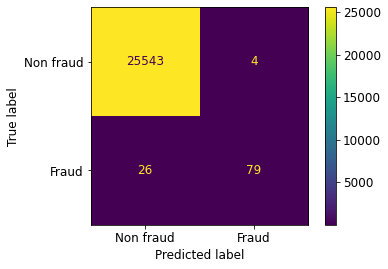

In [27]:
ConfusionMatrixDisplay.from_estimator(
    lr_default, X_valid, y_valid,
    display_labels=["Non fraud", "Fraud"],
);

Now let's rebuild our pipeline but using the `class_weight` argument and setting it as `class_weight={1:100}`. 
This is equivalent to saying "repeat every positive example 100x in the training set",
but repeating data would slow down the code, whereas this doesn't
since it just weights the error on the second class 100x more than the first class.
In the context of our data, we are saying that a false negative is 100x more problematic than a false positive. 

In [28]:
lr_100 = LogisticRegression(random_state=12, max_iter=1000, class_weight={1:100})
lr_100.fit(X_train,y_train);

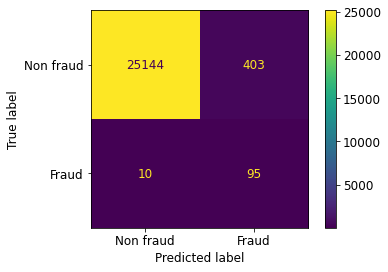

In [29]:
ConfusionMatrixDisplay.from_estimator(
    lr_100,
    X_valid,
    y_valid,
    display_labels=["Non fraud", "Fraud"],
);

Notice that we now have reduced false negatives and predicted more true positives this time.
But, as a consequence, we pay a price since now we are also increasing false positives. 

We can also set `class_weight="balanced"`.
This sets the weights automatically so that the classes are "equal",
by automatically adjust weights inversely proportional to class frequencies in the input data.
So if there is 10x less of class 2 in the data,
its errors will be weighted 10x in the computation of the final score.

In [30]:
lr_balanced = LogisticRegression(random_state=12, max_iter=1000, class_weight="balanced")
lr_balanced.fit(X_train,y_train);

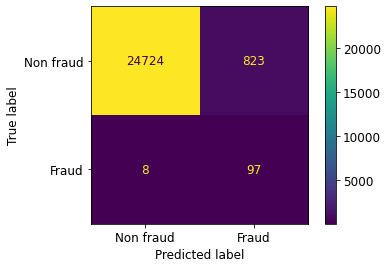

In [31]:
ConfusionMatrixDisplay.from_estimator(
    lr_balanced,
    X_valid,
    y_valid,
    display_labels=["Non fraud", "Fraud"],
);

Again, we have reduced the number of false negatives and increased the number of true positives but we have many more false positives now!
Overall, we can say that our weight adjustments are making the model more likely to make the prediction "fraud" on a sample.

#### Are we doing better with `class_weight="balanced"`?

Let's compare some metrics and find out. 

In [32]:
lr_default.score(X_valid, y_valid)

0.9988305005457664

In [33]:
lr_balanced.score(X_valid, y_valid)

0.9676048651177296

Changing the class weight will **generally reduce accuracy**.
The original model was trying to maximize accuracy. Now you're telling it to do something different.
But we know now that accuracy isn't the only metric that matters.
Let's explain why this happens. 

Since there are so many more negative examples than positive ones, false-positives affect accuracy much more than false negatives.
Thus, precision matters a lot more than recall in this accuracy calculation.
So, the default method trades off a lot of recall for a bit of precision.
We are paying a "fee" in precision for a greater recall value. 

## Let's Practice

<img src="imgs/Q_cm.png"  width = "60%" alt="404 image" />

Use the diagram above to answer the questions.

1\. How many examples did the model of this matrix correctly label as "Guard"?   
2\. If **Forward** is the positive label, how many ***false-positive*** values are there?   
3\. How many examples does the model incorrectly predict?   
4\. What is the recall of the confusion matrix assuming that **Forward** is the positive label?    
5\. What is the precision of the confusion matrix assuming that **Forward** is the positive label?   
6\. What is the f1 score assuming that **Forward** is the positive label?   


**True or False:**       

7\. In spam classification, false positives are often more damaging than false negatives (assume "positive" means the email is spam, "negative" means it's not).    
8\. In medical diagnosis, high recall is often more important than high precision.    
9\. The weighted average in the classification report gives equal importance to all classes.    
10\. Setting `class_weight={1:100}` will make each example of the second class label be counted 100 times.

```{admonition} Solutions!
:class: dropdown

1. 26
2. 4
3. 7
4. $0.86 = 19/22$
5. $0.83 = 19/23$
6. $ 2 * \frac{0.86 * 0.83}{0.86 + 0.83} = 0.84$
7. True
8. True
9. False
10. True
```

## Regression Metrics 

For this part, since we need to use data that corresponds to a regression problem, we are bringing back our [California housing dataset](https://www.kaggle.com/harrywang/housing). 

We want to predict the median house value for different locations.

In [34]:
housing_df = pd.read_csv("data/housing.csv")
train_df, test_df = train_test_split(housing_df, test_size=0.1, random_state=123)


train_df = train_df.assign(rooms_per_household = train_df["total_rooms"]/train_df["households"],
                           bedrooms_per_household = train_df["total_bedrooms"]/train_df["households"],
                           population_per_household = train_df["population"]/train_df["households"])
                        
test_df = test_df.assign(rooms_per_household = test_df["total_rooms"]/test_df["households"],
                         bedrooms_per_household = test_df["total_bedrooms"]/test_df["households"],
                         population_per_household = test_df["population"]/test_df["households"])
                         
train_df = train_df.drop(columns=['total_rooms', 'total_bedrooms', 'population'])  
test_df = test_df.drop(columns=['total_rooms', 'total_bedrooms', 'population']) 

In [35]:
X_train = train_df.drop(columns=["median_house_value"])
y_train = train_df["median_house_value"]
X_test = test_df.drop(columns=["median_house_value"])
y_test = test_df["median_house_value"]

numeric_features = [ "longitude", "latitude",
                     "housing_median_age",
                     "households", "median_income",
                     "rooms_per_household",
                     "bedrooms_per_household",
                     "population_per_household"]
                     
categorical_features = ["ocean_proximity"]

X_train.head()

,longitude,latitude,housing_median_age,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
6051,-117.75,34.04,22.0,602.0,3.1250,INLAND,4.897010,1.056478,4.318937
20113,-119.57,37.94,17.0,20.0,3.4861,INLAND,17.300000,6.500000,2.550000
14289,-117.13,32.74,46.0,708.0,2.6604,NEAR OCEAN,4.738701,1.084746,2.057910
13665,-117.31,34.02,18.0,285.0,5.2139,INLAND,5.733333,0.961404,3.154386
14471,-117.23,32.88,18.0,1458.0,1.8580,NEAR OCEAN,3.817558,1.004801,4.323045


We are going to bring in our previous pipelines and fit our model. 

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), 
           ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
           ("onehot", OneHotEncoder(handle_unknown="ignore"))]
)

preprocessor = make_column_transformer(
(numeric_transformer, numeric_features),
        (categorical_transformer, categorical_features), 
    remainder='passthrough')

pipe = make_pipeline(preprocessor, KNeighborsRegressor())
pipe.fit(X_train, y_train);

As you know, since we aren't doing classification anymore, so we can't just check for equality.

In [37]:
predicted_y = pipe.predict(X_train) 

In [38]:
predicted_y

array([111740., 117380., 187700., ..., 271420., 265180.,  60860.])

In [39]:
y_train.values

array([113600., 137500., 170100., ..., 286200., 412500.,  59300.])

In [40]:
(predicted_y == y_train).mean()  # "Accuracy"

0.01232773471145564

The predicted values will rarely be exactly the same as the real ones.
Instead, we need a score that reflects how right/wrong each prediction is or how close we are to the actual numeric value.

We are going to discuss 4 different ones lightly but, if you want to see more regression metrics in detail, you can refer to the [sklearn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics). 

###  Mean squared error (MSE)

Mean Squared Error is a common measure for error and it is the same as taking the residual sum of squares (RSS, which we saw in linear regression) and dividing it on the number of samples to get an average error per sample.

$$MSE = \frac{1}{\text{total samples}} \displaystyle\sum_{i=1}^{\text{total samples}} (\text{true}_i - {\text{predicted}_i})^2$$

$$MSE = \frac{1}{n} \displaystyle\sum_{i=1}^{n} (y_i - {f(x_i)})^2$$

We calculate this by calculating the difference between the predicted and actual value, square it and sum all these values for every example in the data. 
The higher the MSE, the worse the model performs.

In [41]:
((y_train - predicted_y)**2).mean()

2570054492.048015

Perfect predictions would have MSE = 0 (no error in any predictions).

We can use `mean_squared_error` from `sklearn.metrics` again instead of calculating this ourselves. 

In [42]:
from sklearn.metrics import mean_squared_error 

In [43]:
mean_squared_error(y_train, predicted_y)

2570054492.048064

#### The disadvantages

If we look at MSE value, it's huge.
Having a mean error of 2.5 billion certainly sounds like a lot,
but is it bad?
How do we know how big a "good" error is?

Unlike classification, in regression, our target has units. 
In this case, our target column is the median housing value which is in dollars. 
That means that the mean squared error is in dollars$^2$. 
This is a benefit in the sense that our error has units,
however the units itself are not that helpful (what is a squared dollar?).
Having problem-specific units can also make it hard to compare between models
and develop an intuition for what is a good value
since the score depends on the scale of the targets. 
If we were working in cents instead of dollars, our MSE would be 10,000 X (100<sup>2</sup>) higher!

### Root mean squared error  (RMSE)

The MSE we had before was in $dollars^2$,
so an intuitive way to make this more interpretable
would be to take the square root of the value to get the units in dollars.
This is a more relatable metric and it is called the root mean squared error, or RMSE. 

This is the square root of $MSE$.

$$RMSE = \sqrt{MSE}$$

$$RMSE =  \sqrt{\frac{1}{\text{total samples}} \displaystyle\sum_{i=1}^{\text{total samples}} (\text{true}_i - {\text{predicted}_i})^2}$$

$$RMSE = \sqrt{\frac{1}{n} \displaystyle\sum_{i=1}^{n} (y_i - {f(x_i)})^2}$$


In [44]:
mean_squared_error(y_train, predicted_y)

2570054492.048064

In [45]:
import numpy as np

np.sqrt(mean_squared_error(y_train, predicted_y))

50695.704867849156

This now has the units in dollars.  Instead of 2 billion dollars squared, our error measurement is around $50,000.
This is interpretable for a single prediction,
but how would it work to report an RMSE for an entire dataset?

Let's plot the predicted vs the true housing prices here.

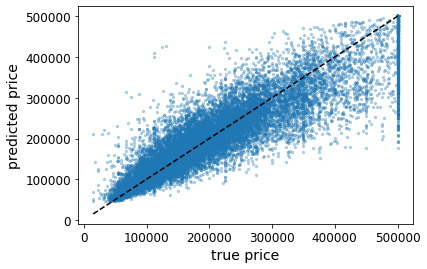

In [46]:
df = pd.DataFrame(y_train).assign(predicted = predicted_y).rename(columns = {'median_house_value': 'true'})
df = pd.DataFrame(y_train).assign(predicted = predicted_y).rename(columns = {'median_house_value': 'true'})
plt.scatter(y_train, predicted_y, alpha=0.3, s = 5)
grid = np.linspace(y_train.min(), y_train.max(), 1000)
plt.plot(grid, grid, '--k');
plt.xticks(fontsize= 12);
plt.yticks(fontsize= 12);
plt.xlabel("true price", fontsize=14);
plt.ylabel("predicted price", fontsize=14);

When we plot our predictions versus the examples' actual value, we can see cases where our prediction is way off.
Points under the line $y=x$ means we're under-predicting price, points over the line means we're over-predicting price.

*Question: Is an RMSE of \$30,000 acceptable?*   

- For a house worth \$600k, it seems reasonable! That's a 5% error.
- For a house worth \$60k, that is terrible. It's a 50% error.

RMSE is in absolute units and does not account for the original value of the prediction.
So how can we adjust to this? 

...Enter **MAPE**!

### MAPE - Mean Absolute Percent Error (MAPE)

Instead of computing the absolute error,
we can calculate a percentage error for each example.
Now the errors are both positive (predict too high) and negative (predict too low).

In [47]:
percent_errors = (predicted_y - y_train)/y_train * 100.
percent_errors.head()

6051     -1.637324
20113   -14.632727
14289    10.346855
13665     6.713070
14471   -10.965854
Name: median_house_value, dtype: float64

We can look at the absolute percent error which now shows us how far off we were independent of direction. 

In [48]:
np.abs(percent_errors).head()

6051      1.637324
20113    14.632727
14289    10.346855
13665     6.713070
14471    10.965854
Name: median_house_value, dtype: float64

And like MSE, we can take the average over all the examples. 

In [49]:
np.abs(percent_errors).mean()

18.192997502985257

This is called **Mean Absolute Percent Error (MAPE)**.
The value is quite interpretable. We can see that on average, we have around 18% error in our predicted median housing valuation.

However,
it is worth pointing out that MAPE also has drawbacks,
most notably that it don't work well with non-positive values 
and that it is biased towards low forecasts,
which makes it unsuitable for predictive models where large errors are expected
(for more details, see https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8279135/).
MAPE is still commonly used because of its ease of interpretation
and there there are variations of MAPE to asses these shortcoming,
most notably symmetric MAPE (SMAPE)).

<!-- For example, for the actual value 100 and estimated value of 90, the MAPE is 0.10. For the same estimated value and actual value of 80, the MAPE is 0.125. Therefore when using MAPE as an objective function, the estimator prefers smaller values and can be biased towards negative errors. -->

### $R^2$ (R squared)

We've seen this before!
This is the score that `sklearn` uses by default when you call `.score()` so we've already seen $R^2$ in our regression problems. 
You can <a href="https://en.wikipedia.org/wiki/Coefficient_of_determination" target="_blank">read about it here</a> but we are going to just give you the quick notes. 

Intuition: $R^2$ is the residual sum of squares normalized to the total sum of squares. In other words, it is the proportion of the variation in the target feature that the model is able to explain using the variation in the input features.

- 1 = Perfect score, all the variation in the target variable can be explained by the model applied to the input features.
- 0 = None of the variation in the target variable can be explained by the model applied to the input features. There is no predictive value in the model as we would achieve the same result by constantly predicting constantly predicting the mean of the data.
- < 0 = The model is performing worse than constantly predicting the mean of the data.

We can use the default scoring from `.score()` or we can calculate $R^2$ using `r2_score` from `sklearn.metrics`

In [50]:
from sklearn.metrics import r2_score

$R^2$ is a great default to use for reporting the performance of regression models,
and if you need something that is easier to interpret (such as a percentage)
or an error with units,
you can opt for one of the other metrics above
(there are more notes on R2 versus MAPE in pubmed article I linked to in the MAPE section).

Note that we can reverse the variables in the calculation of MSE but not R<sup>2</sup>.

In [51]:
print(mean_squared_error(y_train, predicted_y))
print(mean_squared_error(predicted_y, y_train))

2570054492.048064
2570054492.048064


In [52]:
print(r2_score(y_train, predicted_y))
print(r2_score(predicted_y, y_train))

0.8059396097446094
0.742915970464153


## Let's Practice 

1\. Which measurement will have units which are the square values of the target column units?    
2\. For which of the following is it possible to have negative values?    
3\. Which measurement is expressed as a percentage?    
4\. Calculate the MSE from the values given below.     


|Observation | True Value | Predicted Value |
|------------|------------|-----------------|
|0           | 4          | 5               |
|1           | 12         | 10              |
|2           | 6          | 9               |
|3           | 9          | 8               |
|4           | 3          | 3               |


**True or False:**   

5\. We can still use recall and precision for regression problems but now we have other measurements we can use as well.      
6\. A lower RMSE value indicates a better model.      
7\. In regression problems, calculating $R^2$  using `r2_score()` and `.score()` (with default values) will produce the same results.     

```{admonition} Solutions!
:class: dropdown

1. $MSE$
2. $R^2$
3. $MAPE$
4. 3
5. False
6. True
7. True

```

## Passing Different Scoring Methods

We now know about all these metrics; how do we implement them? 
We are lucky because it's relatively easy and can be applied to both classification and regression problems. 

Let's start with regression and our regression measurements. 
This means bringing back our California housing dataset.

In [53]:
X_train.head()

,longitude,latitude,housing_median_age,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
6051,-117.75,34.04,22.0,602.0,3.1250,INLAND,4.897010,1.056478,4.318937
20113,-119.57,37.94,17.0,20.0,3.4861,INLAND,17.300000,6.500000,2.550000
14289,-117.13,32.74,46.0,708.0,2.6604,NEAR OCEAN,4.738701,1.084746,2.057910
13665,-117.31,34.02,18.0,285.0,5.2139,INLAND,5.733333,0.961404,3.154386
14471,-117.23,32.88,18.0,1458.0,1.8580,NEAR OCEAN,3.817558,1.004801,4.323045


And our pipelines. 

This time we are using $k$-nn.

In [54]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), 
           ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
           ("onehot", OneHotEncoder(handle_unknown="ignore"))]
)

preprocessor = make_column_transformer(
(numeric_transformer, numeric_features),
        (categorical_transformer, categorical_features), 
    remainder='passthrough')

pipe_regression = make_pipeline(preprocessor, KNeighborsRegressor())

### Cross-validation

Normally after building our pipelines, we would now either do cross-validation or hyperparameter tuning but let's start with the `cross_validate()` function. 

All the possible scoring metrics that this argument accepts are available [here in the sklearn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter). 
Directly from the docs:

> All scorer objects follow the convention that higher return values are better than lower return values. Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric.

So if we wanted the RMSE measure, we would specify `neg_mean_squared_error` and the negated value of the metric will be returned in our dataframe. 

In [55]:
pd.DataFrame(
    cross_validate(
        pipe_regression,
        X_train,
        y_train, 
    )
)

,fit_time,score_time,test_score
0,0.048384,0.260229,0.695818
1,0.038649,0.244504,0.707483
2,0.037045,0.247833,0.713788
3,0.037473,0.251970,0.686938
4,0.037632,0.209049,0.724608


In [56]:
pd.DataFrame(
    cross_validate(
        pipe_regression,
        X_train,
        y_train, 
        scoring = 'neg_root_mean_squared_error'
    )
)

,fit_time,score_time,test_score
0,0.038403,0.259079,-62462.584290
1,0.040179,0.244061,-63437.715015
2,0.039809,0.247949,-62613.202523
3,0.039748,0.251017,-64204.295214
4,0.036887,0.208489,-59217.838633


Now our cross-validation returns percentages! 

We can also return multiple scoring measures together by making a dictionary and then specifying the dictionary in the `scoring` argument. 

In [57]:
scoring={
    "neg_mse": "neg_mean_squared_error",    
    "neg_rmse": "neg_root_mean_squared_error",    
    "mape_score": 'neg_mean_absolute_percentage_error',
    "r2": "r2",
}

In [58]:
pd.DataFrame(
    cross_validate(
        pipe_regression,
        X_train,
        y_train,
        scoring=scoring
    )
)

,fit_time,score_time,test_neg_mse,test_neg_rmse,test_mape_score,test_r2
0,0.059981,0.277755,-3.901574e+09,-62462.584290,-0.227097,0.695818
1,0.045837,0.276288,-4.024344e+09,-63437.715015,-0.227546,0.707483
2,0.040251,0.251510,-3.920413e+09,-62613.202523,-0.222369,0.713788
3,0.042084,0.252586,-4.122192e+09,-64204.295214,-0.230167,0.686938
4,0.039941,0.211911,-3.506752e+09,-59217.838633,-0.210335,0.724608


If we set `return_train_score=True` we would return a validation and training score for each measurement! 

In [59]:
pd.DataFrame(
    cross_validate(
        pipe_regression,
        X_train,
        y_train,
        scoring=scoring,
        return_train_score=True
    )
)

,fit_time,score_time,test_neg_mse,train_neg_mse,test_neg_rmse,train_neg_rmse,test_mape_score,train_mape_score,test_r2,train_r2
0,0.058236,0.285248,-3.901574e+09,-2.646129e+09,-62462.584290,-51440.540539,-0.227097,-0.184210,0.695818,0.801659
1,0.039596,0.242525,-4.024344e+09,-2.627996e+09,-63437.715015,-51263.979666,-0.227546,-0.184691,0.707483,0.799575
2,0.037424,0.246107,-3.920413e+09,-2.678975e+09,-62613.202523,-51758.817852,-0.222369,-0.186750,0.713788,0.795944
3,0.039576,0.251874,-4.122192e+09,-2.636180e+09,-64204.295214,-51343.743586,-0.230167,-0.185108,0.686938,0.801232
4,0.039297,0.208939,-3.506752e+09,-2.239671e+09,-59217.838633,-47325.157312,-0.210335,-0.169510,0.724608,0.832498


### What about hyperparameter tuning?

We can do exactly the same thing we saw above with `cross_validate()` but instead with `GridSearchCV` and `RandomizedSearchCV`. 

In [60]:
from sklearn.model_selection import GridSearchCV


param_grid = {"kneighborsregressor__n_neighbors": [2, 5, 50, 100]}

grid_search = GridSearchCV(
    pipe_regression,
    param_grid,
    cv=5, 
    return_train_score=True,
    n_jobs=-1, 
    scoring='neg_mean_absolute_percentage_error'
);
grid_search.fit(X_train, y_train);

In [61]:
grid_search.best_params_

{'kneighborsregressor__n_neighbors': 5}

In [62]:
grid_search.best_score_

-0.2235027119616972

If we used another scoring metric,
we might end up with another results for the best hyperparameter.

In [63]:
# 'max_error' is a metric we haven't talked about and it is not that useful,
# I just use it here to show that the choice of metric can influence the returned best hyperparameters.

grid_search = GridSearchCV(
    pipe_regression,
    param_grid,
    cv=5, 
    return_train_score=True,
    n_jobs=-1, 
    scoring='max_error'
);
grid_search.fit(X_train, y_train);

In [64]:
grid_search.best_params_

{'kneighborsregressor__n_neighbors': 100}

In [65]:
grid_search.best_score_

-373468.55

### ... and with Classification? 

Let's bring back our credit card data set and build our pipeline.

In [66]:
train_df, test_df = train_test_split(cc_df, test_size=0.3, random_state=111)

X_train, y_train = train_df.drop(columns=["Class"]), train_df["Class"]
X_test, y_test = test_df.drop(columns=["Class"]), test_df["Class"]

We can use `class_weight='balanced'` in our classifier...

In [67]:
from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier(random_state=123, class_weight='balanced')

In [68]:
import scipy

param_grid = {"max_depth": scipy.stats.randint(low=1, high=100)}

... and tune our model for the thing we care about. 

In this case, we are specifying the `f1` score.

In [69]:
from sklearn.model_selection import RandomizedSearchCV
grid_search = RandomizedSearchCV(
    dt_model,
    param_grid,
    cv=3,
    return_train_score=True,
    verbose=2,
    n_jobs=-1,
    n_iter = 6,
    scoring='f1',
    random_state=2080
)
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [70]:
grid_search.best_params_

{'max_depth': 69}

This returns the `max_depth` value that results in the highest `f1` score, not the `max_depth` with the highest accuracy.

In [71]:
# Validation performance
grid_search.best_score_

0.7877624963028689

In [72]:
# Test performance
grid_search.score(X_test, y_test)

0.7698113207547169

Let's look at our recall score to compare to the next section.

In [73]:
recall_score(y_test, grid_search.predict(X_test))

0.7338129496402878

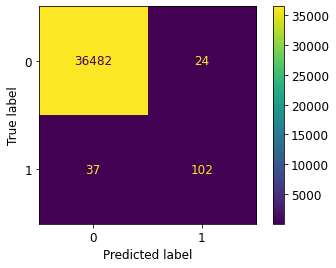

In [74]:
ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test);

If we now tune hyperparameters based on their recall score instead of precision,
you will se that we select a different value for `max_depth`
and that our recall score is higher with this value.

In [75]:
grid_search = RandomizedSearchCV(
    dt_model,
    param_grid,
    cv=3,
    return_train_score=True,
    verbose=2,
    n_jobs=-1,
    n_iter = 6,
    scoring='recall',
    random_state=2080
)
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [76]:
grid_search.best_params_

{'max_depth': 4}

This returns the `max_depth` value that results in the highest `f1` score, not the `max_depth` with the highest accuracy.

In [77]:
# Validation performance
grid_search.best_score_

0.8839152059491043

In [78]:
# Test performance
grid_search.score(X_test, y_test)

0.841726618705036

As you can see above,
our recall score is now higher
(remember that the default scoring method changes to the metric used during hyperparameter optimization)
If we look at our f1 score we can see that it is worse than before,
as expected.
When we are optimizing on recall alone,
we are only trying to catch as many of the true positives as possible
and don't care about that we are incorrectly classifying many negatives as positives
which will lead to a lower precision and f1 score.

In [79]:
f1_score(y_test, grid_search.predict(X_test))

0.1984732824427481

In the confusion matrix,
we have many more values in the top right quadrant
because there is no penalty for incorrectly classifying observations here when just using recall.

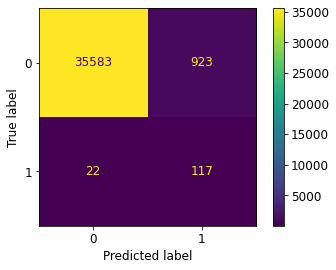

In [80]:
ConfusionMatrixDisplay.from_estimator( grid_search, X_test, y_test);

## Let's Practice

**True or False:**     
1. We are limited to the scoring measures offered from sklearn.    
2. If we specify the scoring method in `GridSearchCV` and `RandomizedSearchCV`, `best_param_`  will return the parameters with the best specified measure.*    

```{admonition} Solutions!
:class: dropdown

2. False, we could also specify our own scorer function https://scikit-learn.org/stable/modules/model_evaluation.html#scoring
3. True

```

## Let's Practice - Coding

Let’s bring back the Pokémon dataset that we saw previously. 

This time let's try to predict whether a Pokémon has a legendary status or not based on their other attributes.

In [81]:
pk_df = pd.read_csv('data/pokemon.csv')

train_df, test_df = train_test_split(pk_df, test_size=0.3, random_state=1)

X_train_big = train_df.drop(columns=['legendary'])
y_train_big = train_df['legendary']
X_test = test_df.drop(columns=['legendary'])
y_test = test_df['legendary']

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_big, 
    y_train_big, 
    test_size=0.3, 
    random_state=123
)

print(y_train.value_counts())
X_train

0    359
1     33
Name: legendary, dtype: int64


,name,deck_no,attack,defense,sp_attack,sp_defense,speed,capture_rt,total_bs,type,gen
124,Electabuzz,125,83,57,95,85,105,45,490,electric,1
11,Butterfree,12,45,50,90,80,70,45,395,bug,1
77,Rapidash,78,100,70,80,80,105,60,500,fire,1
405,Budew,406,30,35,50,70,55,255,280,grass,4
799,Necrozma,800,107,101,127,89,79,3,600,psychic,7
...,...,...,...,...,...,...,...,...,...,...,...
33,Nidoking,34,102,77,85,75,85,45,505,poison,1
458,Snover,459,62,50,62,60,40,120,334,grass,4
234,Smeargle,235,20,35,20,45,75,45,250,normal,2
287,Vigoroth,288,80,80,55,55,90,120,440,normal,3


Let's do cross-validation and look at the scores from cross-validation of not just accuracy, but precision and recall and the f1 score as well.


1. Build a pipeline containing the column transformer and an SVC model and set `class_weight="balanced"` in the SVM classifier. 
2. Perform cross-validation using cross-validate on the training split using the scoring measures accuracy, precision, recall and f1. Save the results in a dataframe.

**Solutions**

1\.

In [95]:
from sklearn.svm import SVC


num_pipe = make_pipeline(
    SimpleImputer(),
    StandardScaler()
)

cat_pipe = make_pipeline(
    SimpleImputer(strategy='constant'),
    OneHotEncoder(handle_unknown='ignore')
)

num_cols = X_train.select_dtypes('number').columns

num_cols = [
 'capture_rt',
 'total_bs',
 'gen']
cat_cols = ['type']

preprocessing = make_column_transformer(
    (num_pipe, num_cols),
    (cat_pipe, cat_cols)
)

main_pipe = make_pipeline(
    preprocessing,
    SVC(class_weight='balanced')
)

2\.

In [96]:
pd.DataFrame(
    cross_validate(
        main_pipe,
        X_valid,
        y_valid,
        scoring=['accuracy', 'precision', 'recall', 'f1']
    )
)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.025501,0.007092,0.941176,0.666667,0.666667,0.666667
1,0.009468,0.006572,0.941176,0.666667,0.666667,0.666667
2,0.008165,0.005613,0.911765,0.500000,0.666667,0.571429
3,0.008900,0.006036,0.939394,0.500000,0.500000,0.500000
4,0.008775,0.006466,0.909091,0.500000,0.333333,0.400000


## What We've Learned Today

- The components of a confusion matrix.
- How to calculate precision, recall, and f1-score.
- How to implement the `class_weight` argument.
- Some of the different scoring metrics used in assessing regression problems; MSE, RMSE, $R^2$, MAPE.
- How to apply different scoring functions with `cross_validate`, `GridSearchCV` and `RandomizedSearchCV`.